In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_filled = pd.read_csv("datadet.csv")

In [6]:
df_filled.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,...,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,6.248400e+04,62484.000000,...,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000
mean,131242.500000,1.890106,772.460550,10731.355227,127925.981051,104.247503,3.834086,7.944882,1.041317e+05,77.085558,...,0.225162,90130.369647,300.165050,7.601146,0.219992,0.053128,0.00312,0.048355,0.202346,0.005809
std,18037.721447,3.294003,71.644113,10303.905843,134003.357926,138.466501,5.519016,11.758840,1.209267e+06,119.646339,...,0.417692,66263.258748,670.473955,5.957123,0.414244,0.166323,0.02954,0.072672,0.066089,0.075999
min,100001.000000,0.000000,525.000000,500.000000,1000.000000,0.000000,0.000000,0.000000,-8.138950e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.054400,0.000000
25%,115621.750000,0.000000,725.000000,2000.000000,55000.000000,0.000000,0.000000,0.000000,2.651645e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.159200,0.000000
50%,131242.500000,0.200000,775.000000,6000.000000,90000.000000,20.000000,1.000000,2.000000,4.831467e+04,0.000000,...,0.000000,117195.500000,101.355000,12.000000,0.000000,0.002000,0.00000,0.029000,0.188400,0.000000
75%,146863.250000,2.700000,800.000000,15000.000000,150000.000000,194.000000,6.000000,13.000000,8.320660e+04,139.000000,...,0.000000,146593.000000,358.155000,12.000000,0.000000,0.022000,0.00050,0.062000,0.227500,0.000000
max,162484.000000,77.400000,900.000000,50000.000000,1000000.000000,786.000000,81.000000,139.000000,1.090704e+08,757.000000,...,1.000000,168817.000000,39592.360000,108.000000,1.000000,0.999000,0.98780,0.888000,0.788200,1.000000


Hence no null vaues

### Visualizing and geetting insights from data

Distribution of Default Indicator

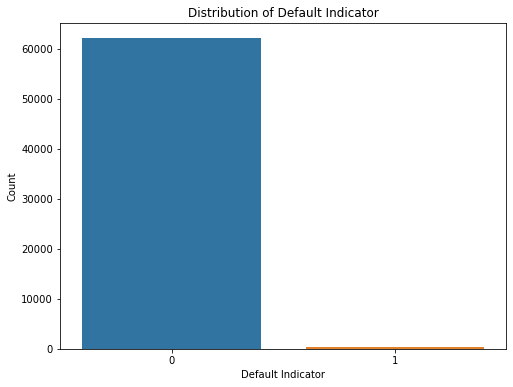

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='default_ind', data=df_filled)
plt.title('Distribution of Default Indicator')
plt.xlabel('Default Indicator')
plt.ylabel('Count')
plt.show()

### Conclusion: Majority of the samples are non-default, with fewer default cases.


## 2. Risk Score 1 Distribution for Default and Non-Default

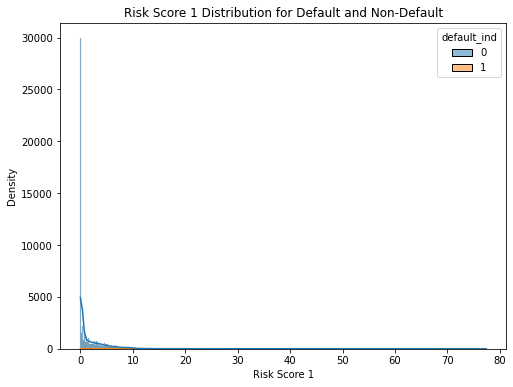

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_filled, x='risk_score_1', hue='default_ind', kde=True)
plt.title('Risk Score 1 Distribution for Default and Non-Default')
plt.xlabel('Risk Score 1')
plt.ylabel('Density')
plt.show()

### Conclusion: Higher risk scores seem to be more associated with default cases.

## 3. Income Distribution for Default and Non-Default

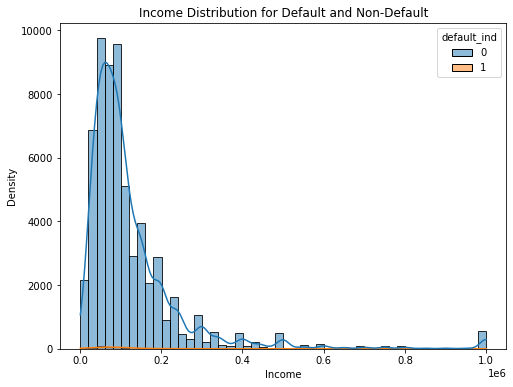

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_filled, x='income', hue='default_ind', kde=True, bins=50)
plt.title('Income Distribution for Default and Non-Default')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

### Conclusion: There is no significant difference in income distribution between default and non-default cases.

## 4. Acquisition Channel vs Default Rate

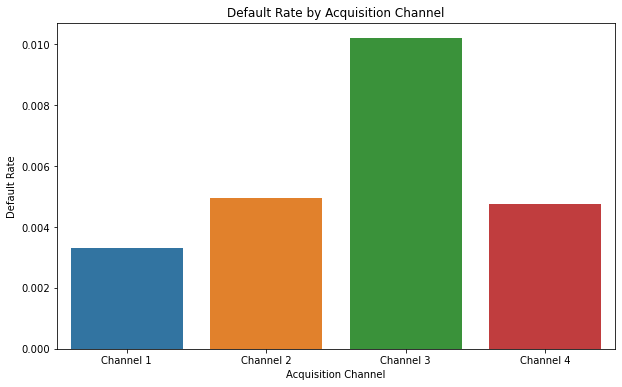

In [10]:
plt.figure(figsize=(10, 6))
acq_channel_default = df_filled.groupby('acq_channel')['default_ind'].mean().reset_index()
sns.barplot(x='acq_channel', y='default_ind', data=acq_channel_default)
plt.title('Default Rate by Acquisition Channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('Default Rate')
plt.show()

### Conclusion: Some acquisition channels have higher default rates than others.


## 5. Product Name vs Default Rate

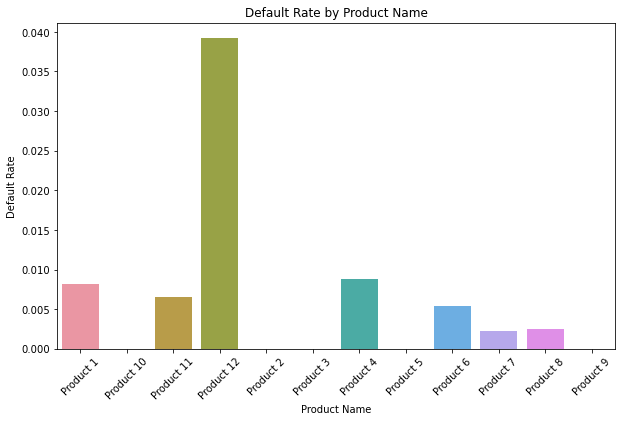

In [11]:
plt.figure(figsize=(10, 6))
prod_default = df_filled.groupby('prod_name')['default_ind'].mean().reset_index()
sns.barplot(x='prod_name', y='default_ind', data=prod_default)
plt.title('Default Rate by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

### Conclusion: Certain products are associated with higher default rates.

## 6. State Code vs Default Rate

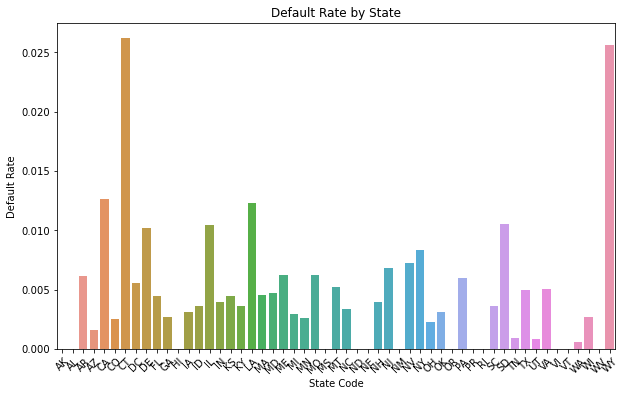

In [12]:
plt.figure(figsize=(10, 6))
state_default = df_filled.groupby('state_code')['default_ind'].mean().reset_index()
sns.barplot(x='state_code', y='default_ind', data=state_default)
plt.title('Default Rate by State')
plt.xlabel('State Code')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

### Conclusion: Default rates vary by state.

## 7. Limit Distribution for Default and Non-Default

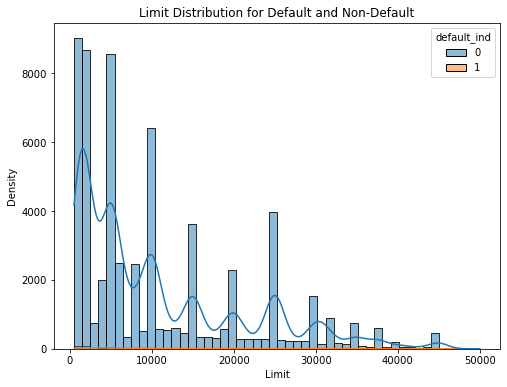

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_filled, x='limit', hue='default_ind', kde=True, bins=50)
plt.title('Limit Distribution for Default and Non-Default')
plt.xlabel('Limit')
plt.ylabel('Density')
plt.show()

### Conclusion: Lower credit limits are more associated with default cases.

## 8. Bureau Score vs Default Indicator

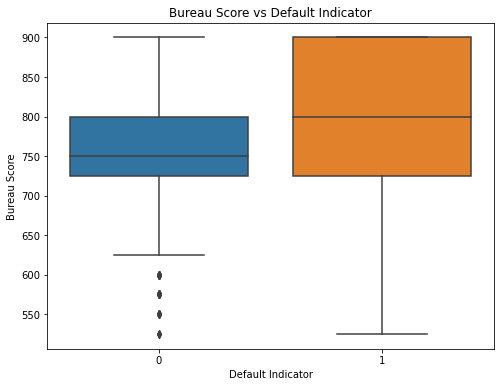

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='bureau_score', data=df_filled)
plt.title('Bureau Score vs Default Indicator')
plt.xlabel('Default Indicator')
plt.ylabel('Bureau Score')
plt.show()

### Conclusion: Default cases tend to have lower bureau scores.

## 9. Risk Score 2 vs Default Indicator

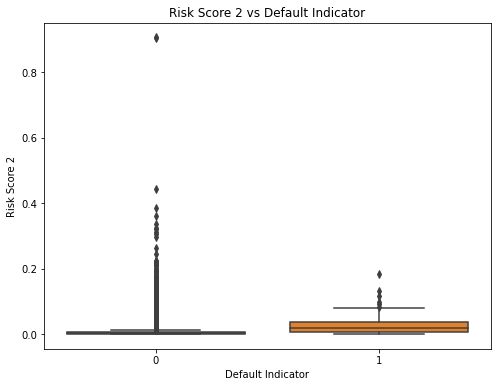

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='risk_score_2', data=df_filled)
plt.title('Risk Score 2 vs Default Indicator')
plt.xlabel('Default Indicator')
plt.ylabel('Risk Score 2')
plt.show()

### Conclusion: Higher Risk Score 2 values are associated with increased likelihood of default.

## 10. Address Mismatch Distribution for Default and Non-Default

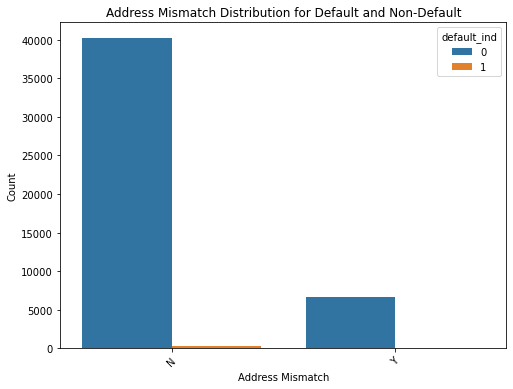

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='addr_mismatch', hue='default_ind', data=df_filled)
plt.title('Address Mismatch Distribution for Default and Non-Default')
plt.xlabel('Address Mismatch')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Conclusion: Address mismatches are slightly more common in default cases.